In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [734]:
adult_data = pd.read_csv(
    "adult.data" ,
    names=[
    "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
adult_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [495]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(adult_data.shape[1]) / cols)
for i, column in enumerate(adult_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult_data.dtypes[column] == np.object:
        adult_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

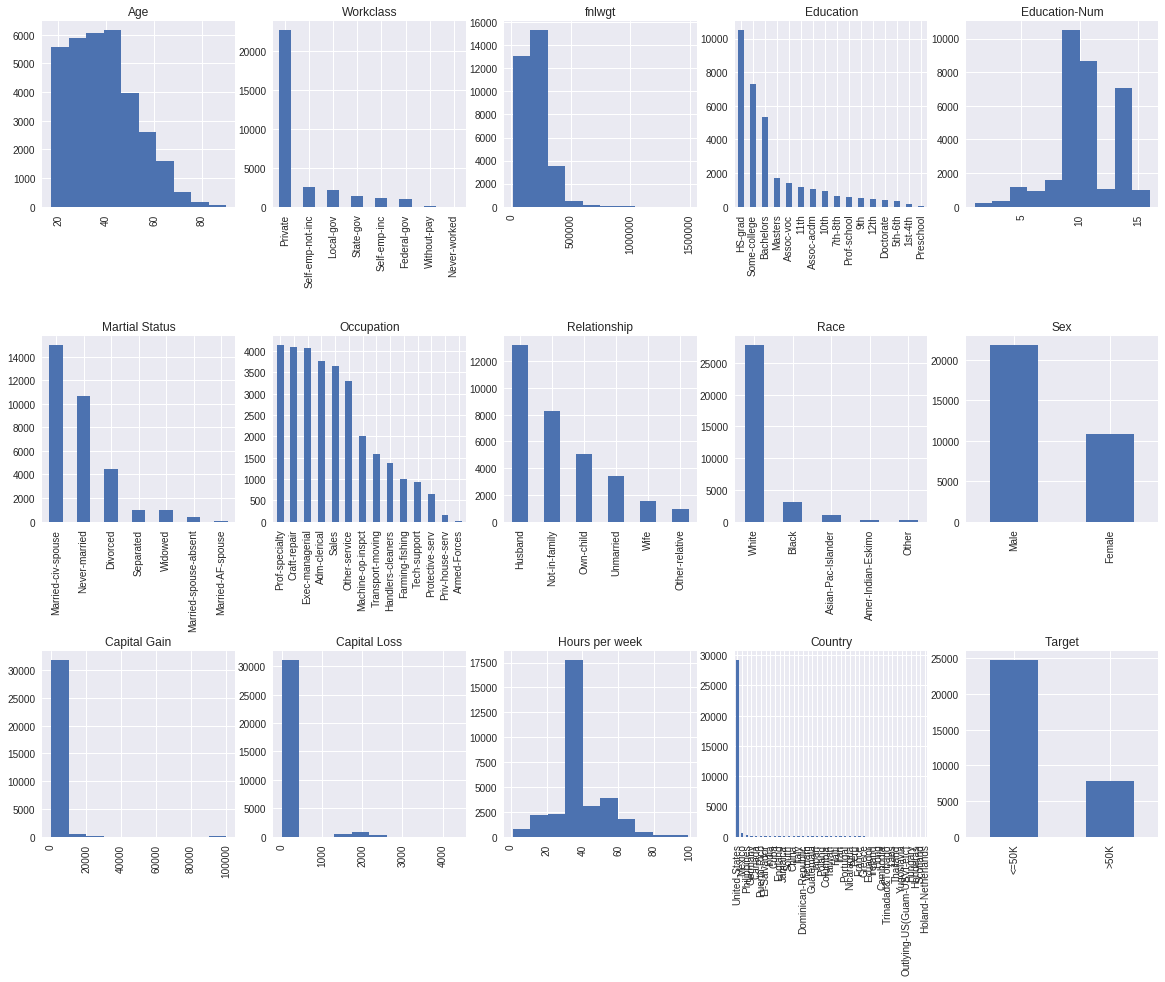

In [496]:
fig

In [497]:
# La mayoría de las personas proceden de gente de Estados Unidos.
# La mayor parte de la población son Hombres y prima la raza blanca.
# Casi toda la gente trabaja en el sector privado.


In [498]:
(adult_data["Country"].value_counts() / adult_data.shape[0]).head()

United-States    0.895857
Mexico           0.019748
Philippines      0.006081
Germany          0.004207
Canada           0.003716
Name: Country, dtype: float64

In [499]:
(adult_data["Sex"].value_counts() / adult_data.shape[0]).head()

Male      0.669205
Female    0.330795
Name: Sex, dtype: float64

In [627]:
(adult_data["Workclass"].value_counts() / adult_data.shape[0]).head()

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Name: Workclass, dtype: float64

In [722]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [723]:
data_dummies = pd.get_dummies(adult_data)

In [724]:
data_dummies.head()

,Age,fnlwgt,Education-Num,Relationship,Sex,Capital Gain,Capital Loss,Hours per week,Country,Workclass_Federal-gov,...,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Target_<=50K,Target_>50K
0,39,77516,13,1,1,2174,0,40,0,0,...,0,0,0,0,0,0,0,1,1,0
1,50,83311,13,0,1,0,0,13,0,0,...,0,0,0,0,0,0,0,1,1,0
2,38,215646,9,1,1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,1,0
3,53,234721,7,0,1,0,0,40,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,5,0,0,0,40,1,0,...,0,0,0,0,0,1,0,0,1,0


In [1180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder

In [1181]:
features = adult_data['Age']

In [1182]:
X = features.values
Y = adult_data['Target'].values


X = X[:,None]
Y = Y[:,None] # convertir el array a 1d
X_train , X_test, y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

In [1183]:
clfRan =  RandomForestClassifier(n_jobs=2)

In [1217]:
ranFit = clfRan.fit(X_train,y_train.ravel())
#Ravel devuelve un array plano.

In [1218]:
n = cross_val_score(ranFit,X,Y.ravel(),cv=5)

In [1219]:
AGE_SCORE=n.mean() 

In [1220]:
encoding = LabelEncoder()
encoding2 = LabelEncoder()
encoding3 = LabelEncoder()

In [1221]:
encoding.fit(adult_data["Sex"].values)
encoding2.fit(adult_data["Relationship"].values)
Workclass = pd.factorize(adult_data["Workclass"])
Occupation = pd.factorize(adult_data["Occupation"])

In [1222]:
Sex = encoding.transform(adult_data["Sex"].values)
MartialStatus= pd.factorize(adult_data["Martial Status"])
Capitalloss = pd.factorize(adult_data["Capital Loss"])
Relationship = encoding2.transform(adult_data["Relationship"].values)
Race = pd.factorize(adult_data["Race"])
Country = pd.factorize(adult_data["Country"])

In [1223]:
adult_data["Sex"] = Sex
adult_data["Relationship"] = Relationship
adult_data["Workclass"]=Workclass[0]
adult_data["Martial Status"]=MartialStatus[0]
adult_data["Occupation"]=Occupation[0]
adult_data["Capital Loss"]=Capitalloss[0]
adult_data["Race"]=Race[0]
adult_data["Country"]=Country[0]

In [1248]:
features = adult_data[["Capital Gain","Relationship","Martial Status","Education-Num","Capital Gain","Capital Loss","Workclass","Sex"]]
features.values

array([[ 2174,     1,     0, ...,     0,     0,     1],
       [    0,     0,     1, ...,     0,     1,     1],
       [    0,     1,     2, ...,     0,     2,     1],
       ..., 
       [    0,     4,     6, ...,     0,     2,     0],
       [    0,     3,     0, ...,     0,     2,     1],
       [15024,     5,     1, ...,     0,     6,     0]])

In [1249]:
X = features.values
Y = adult_data['Target'].values

X_train , X_test, y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

In [1250]:
clfRan =  RandomForestClassifier(n_jobs=4)
ranFit = clfRan.fit(X_train,y_train.ravel())
n = cross_val_score(ranFit,X,Y.ravel(),cv=5)

In [1251]:
FINAL_SCORE=n.mean()

In [1252]:
AGE_SCORE # Solo con la edad.

0.84653435993256354

In [1253]:
FINAL_SCORE # Martial Status , Capital Gain , Relationship, Education-Num

0.85685351089542716